# 6. Exercises

Author : [Gwonhak Lee](https://github.com/snow0369) (gwonhak@gmail.com)

-----

앞서 배운 내용들을 활용하여 간단한 예제 문제들을 해결해보겠습니다.


In [66]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, transpile
from qiskit.providers.aer import AerProvider
from qiskit.tools.visualization import plot_histogram
import random
import numpy as np

### Exercise 1. n-GHZ 상태 측정
  n-Qubit에 대한 GHZ 상태를 준비하고, 측정하는 회로를 구성하고, histogram을 출력합니다.

  $$ |GHZ_n\rangle = \frac{1}{\sqrt{2}} (|0\cdots00\rangle + |1\cdots11\rangle) $$

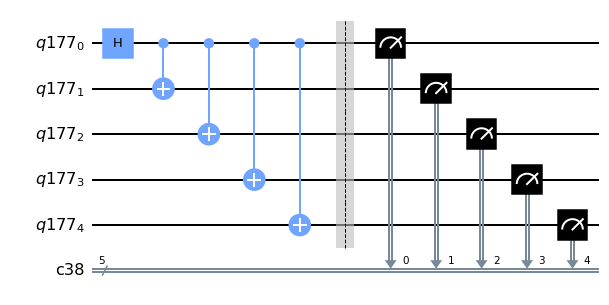

In [67]:
def ghz(n):
    # 객체의 선언
    qr_ghz = QuantumRegister(n)
    cr_ghz = ClassicalRegister(n)
    qc_ghz = QuantumCircuit(qr_ghz, cr_ghz)

    # 회로 구성
    qc_ghz.h(qr_ghz[0])
    for i in range(1, n):
        qc_ghz.cx(0, i)

    qc_ghz.barrier()
    qc_ghz.measure(qr_ghz, cr_ghz)

    return qc_ghz

# 5-ghz 회로 출력
qc = ghz(5)
qc.draw('mpl');

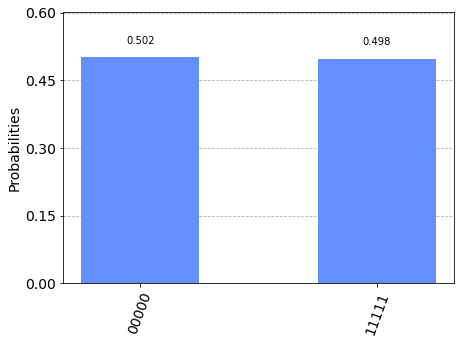

In [68]:
# qasm 시뮬레이션
qasm_simulator = AerProvider().get_backend("qasm_simulator")
job_qasm = execute(qc, backend=qasm_simulator, shots=1024)
counts = job_qasm.result().get_counts()

# 시각화
plot_histogram(counts);

### Exercise 2. Quantum Teleportation
![teleportation-circuit.png](https://github.com/snow0369/qiskit_tutorial_2021_summerschool/raw/master/figures/teleportation-circuit.png)

**hint : use .c_if()**

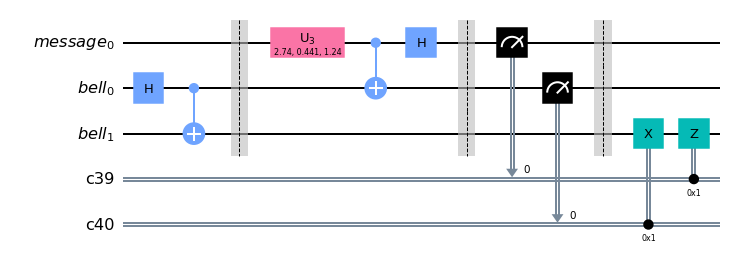

In [69]:
bell_qr = QuantumRegister(2, 'bell')
message_qr = QuantumRegister(1, 'message')
cr1 = ClassicalRegister(1)
cr2 = ClassicalRegister(1)
qtel_qc = QuantumCircuit(message_qr, bell_qr, cr1, cr2)

a1, a2, a3 = ( random.random() * np.pi for _ in range(3) )

# complete the circuit
qtel_qc.h(bell_qr[0])
qtel_qc.cx(bell_qr[0], bell_qr[1])
qtel_qc.barrier()

qtel_qc.u3(a1, a2, a3, message_qr)

qtel_qc.cx(message_qr, bell_qr[0])
qtel_qc.h(message_qr)
qtel_qc.barrier()

qtel_qc.measure(message_qr, cr1)
qtel_qc.measure(bell_qr[0], cr2)
qtel_qc.barrier()

qtel_qc.x(bell_qr[1]).c_if(cr2, 1)
qtel_qc.z(bell_qr[1]).c_if(cr1, 1)

qtel_qc.draw('mpl');

In [70]:
sv_simulator = AerProvider().get_backend('statevector_simulator')
job_sv = sv_simulator.run(qtel_qc)
sv = job_sv.result().get_statevector()
print(sv)
print([sum(sv[:4]), sum(sv[4:])])

[ 0.        +0.j          0.        -0.j          0.        +0.j
  0.20042987+0.j         -0.        +0.j         -0.        +0.j
 -0.        +0.j          0.88608591+0.41794691j]
[(0.2004298720534752+0j), (0.8860859135671616+0.4179469107033526j)]


In [71]:
verif_ckt = QuantumCircuit(1)
verif_ckt.u3(a1, a2, a3, 0)
sv_verif = sv_simulator.run(verif_ckt).result().get_statevector()
print(sv_verif)

[0.20042987+0.j         0.88608591+0.41794691j]


### Exercise 3. Quantum Fourier Transform

qft회로를 transpile하여 u1, u2, 그리고 cx 게이트로 표현합니다.


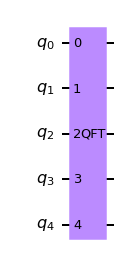

In [72]:
from qiskit.circuit.library.basis_change.qft import QFT

qft_ckt = QFT(5)
qft_ckt.draw("mpl");

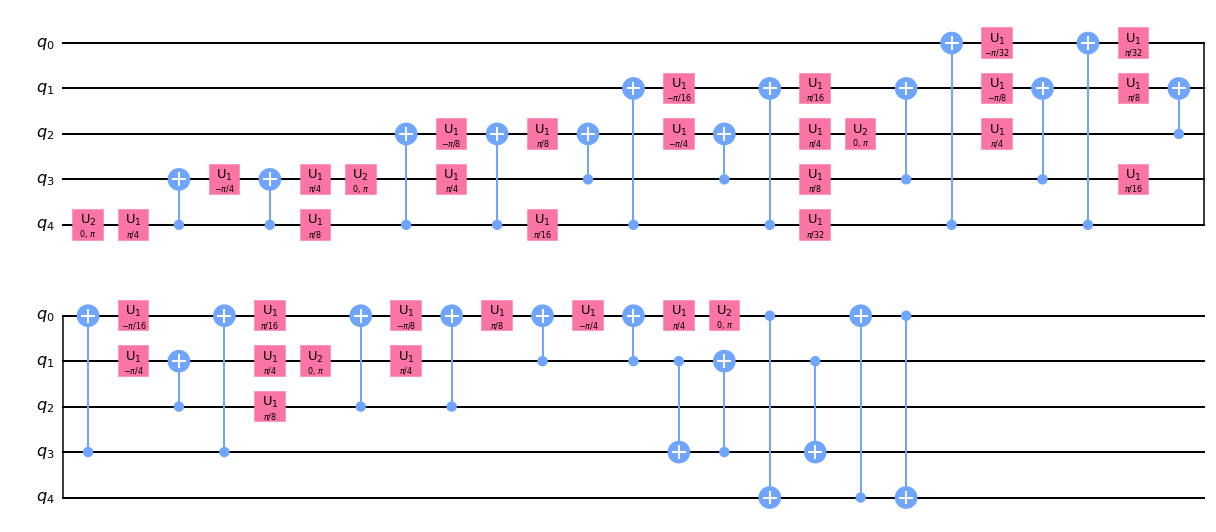

In [73]:
qft_ckt_tr = transpile(qft_ckt, basis_gates=['u1', 'u2', 'cx'])
qft_ckt_tr.draw('mpl');

qft회로를 Linear connectivity Layout에 transpile합니다.

[[0, 1], [1, 0], [1, 2], [2, 1], [2, 3], [3, 2], [3, 4], [4, 3]]


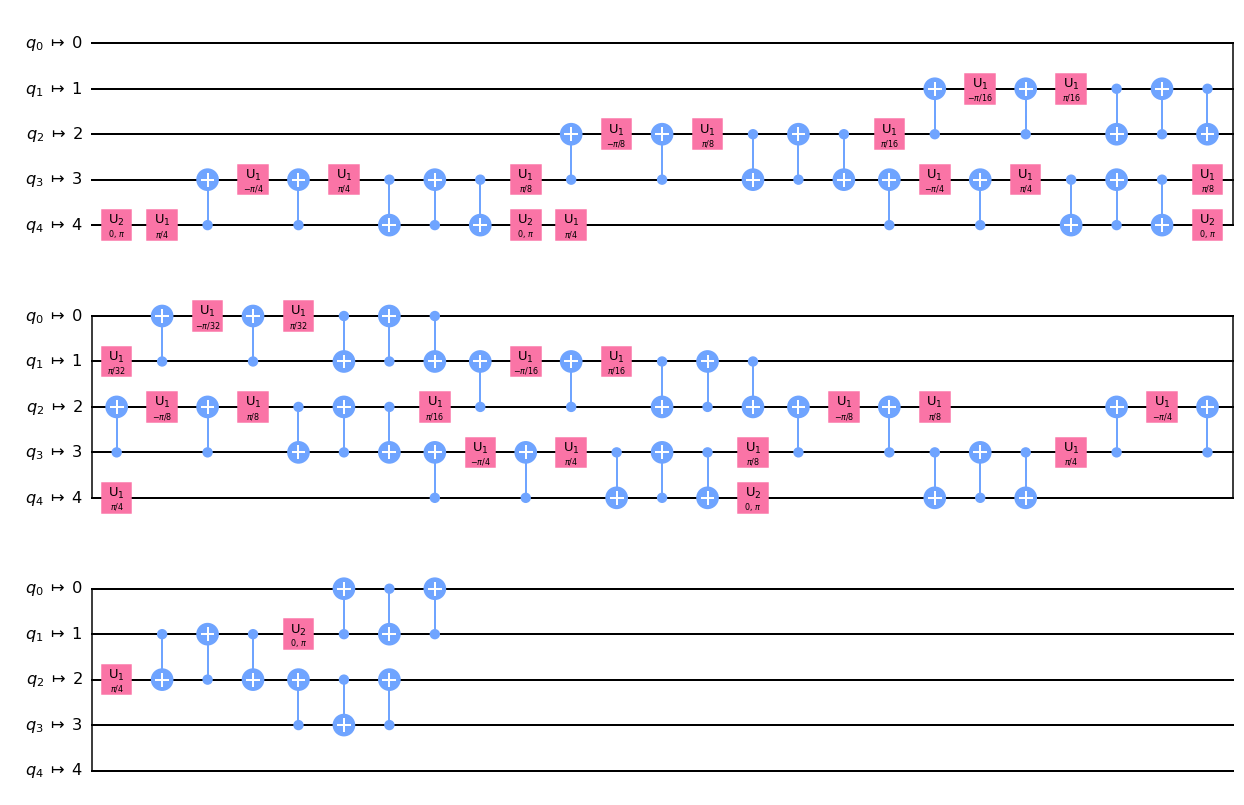

In [76]:
coupling_map = list()
for i in range(5 - 1):
    coupling_map.append([i, i+1])
    coupling_map.append([i+1, i])
qft_ckt_tr_lin = transpile(qft_ckt, basis_gates=['u1', 'u2', 'cx'],
                           coupling_map=coupling_map)
print(coupling_map)
qft_ckt_tr_lin.draw('mpl');